**Import necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Load the dataset**

In [2]:
# Assuming the dataset is in a CSV file named 'Social_Network_Ads.csv'
df = pd.read_csv('Social_Network_Ads.csv')

**Dataset Visualization**

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

**EDA**

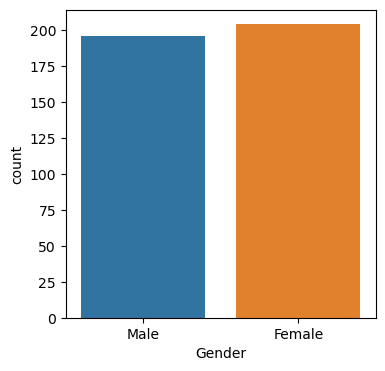

In [5]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Gender'])
plt.show()

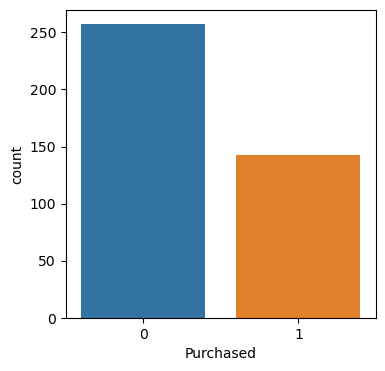

In [6]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Purchased'])
plt.show()

**Feature Extraction**

In [7]:
# Separate features (X) and target variable (y)
X = df.iloc[:, [1, 2, 3]].values  # Considering Gender, Age, and Estimated Salary as features
y = df.iloc[:, 4].values  # Assuming 'Purchased' is the target variable

**Use LabelEncoder for 'Gender' as 'Gender' is non-numeric**

In [8]:
label_encoder = LabelEncoder()
X[:, 0] = label_encoder.fit_transform(X[:, 0])

**Split the dataset into training and testing sets**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Create a Multinomial Naive Bayes classifier**

In [10]:
m_nb_classifier = MultinomialNB()

**Fit the model to the training data**

In [11]:
m_nb_classifier.fit(X_train, y_train)

MultinomialNB()

**Make predictions on the test set**

In [12]:
y_pred = m_nb_classifier.predict(X_test)

**Evaluate the performance of the classifier**

In [13]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

**Print the results**

Multinomial NB Accuracy: 0.6
Multinomial NB Confusion Matrix:
[[38 14]
 [18 10]]
Multinomial NB Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.73      0.70        52
           1       0.42      0.36      0.38        28

    accuracy                           0.60        80
   macro avg       0.55      0.54      0.54        80
weighted avg       0.59      0.60      0.59        80



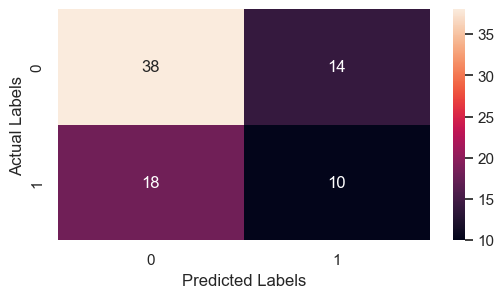

In [14]:
print(f'Multinomial NB Accuracy: {accuracy}')
print(f'Multinomial NB Confusion Matrix:\n{conf_matrix}')
sns.set(rc={'figure.figsize':(6,3)})
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
print(f'Multinomial NB Classification Report:\n{classification_report_str}')

**Predict whether a targeted audience or person will purchase the product or not**

In [15]:
# Assuming we have a new set of feature values for prediction
new_data = np.array([[0, 30, 50000]])  # Example: Gender (0 for Female, 1 for Male), Age, Estimated Salary

# Use the trained Multinomial NB model to make predictions
predicted_purchase = m_nb_classifier.predict(new_data)

# Print the predicted outcome
if predicted_purchase[0] == 1:
    print("The targeted audience is predicted to purchase the product.")
else:
    print("The targeted audience is predicted not to purchase the product.")

The targeted audience is predicted not to purchase the product.


**Output Visualization using Bar Plot**

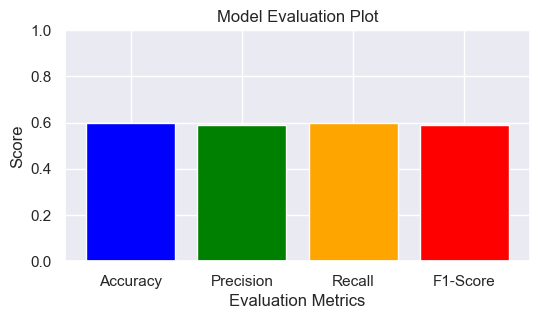

In [16]:
# Assuming we have already evaluated the model and obtained these metrics, hence plotting the same in a bar plot
accuracy = 0.6
precision = 0.59
recall = 0.60
f1_score = 0.59

# Plotting the bar plot
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy, precision, recall, f1_score]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.ylim([0, 1])  # Set the y-axis limit between 0 and 1
plt.title('Model Evaluation Plot')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.show()

**10-fold Cross-Validation**

In [17]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

# Define stratified 10-fold cross-validation
cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define accuracy as the evaluation metric
scoring = make_scorer(accuracy_score)

# Perform cross-validation on Multinomial NB
cv_results = cross_val_score(m_nb_classifier, X, y, cv=cross_val, scoring=scoring)

# Display results
print("Cross-Validation Results:")
print("Individual Accuracies:", cv_results)
print("Average Accuracy:", np.mean(cv_results))

Cross-Validation Results:
Individual Accuracies: [0.65  0.65  0.6   0.65  0.65  0.625 0.65  0.65  0.65  0.625]
Average Accuracy: 0.64


**Cross-Validation Result Visualization using Bar Plot**

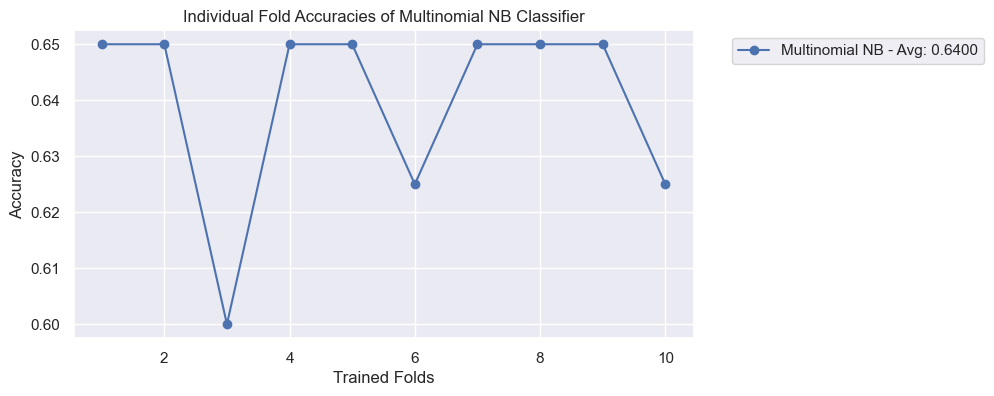

In [18]:
# Cross-Validation Result
model = ['Multinomial NB']
accuracies = {
    'Multinomial NB': [0.65, 0.65, 0.6, 0.65, 0.65, 0.625, 0.65, 0.65, 0.65, 0.625],
}

# Plotting
plt.figure(figsize=(8, 4))

for model in model:
    plt.plot(range(1, 11), accuracies[model], marker='o', label=f'{model} - Avg: {sum(accuracies[model])/10:.4f}')

plt.title('Individual Fold Accuracies of Multinomial NB Classifier')
plt.xlabel('Trained Folds')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Placing the legend outside the plot area
plt.show()

**ROC Curve Plotting for the above Multinomial NB Model**

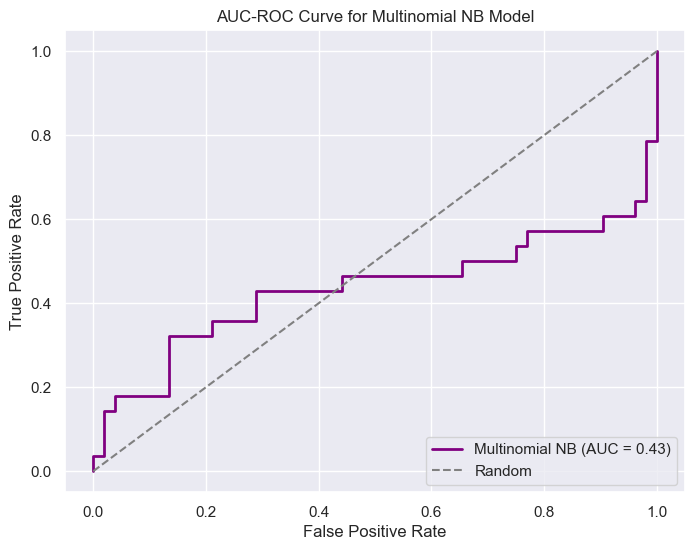

In [19]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test is the actual labels
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Get predicted probabilities for the positive class
m_nb_predicted_scores = m_nb_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Multinomial NB model
m_nb_fpr, m_nb_tpr, _ = roc_curve(y_test_binary, m_nb_predicted_scores)

# Compute AUC for Multinomial NB model
m_nb_roc_auc = auc(m_nb_fpr, m_nb_tpr)

# Plot ROC curve for Multinomial NB model
plt.figure(figsize=(8, 6))
sns.set(style='darkgrid')

plt.plot(m_nb_fpr, m_nb_tpr, color='purple', lw=2, label=f'Multinomial NB (AUC = {m_nb_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Multinomial NB Model')
plt.legend(loc='lower right')
plt.show()